In [6]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics
from sklearn.cross_validation import cross_val_score , cross_val_predict
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

'%.3f'

In [7]:
def accuracy_score(y_actual,y_pred):
    return metrics.accuracy_score(y_actual,y_pred)

In [64]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    font = {'family' : 'normal',
             'size'   : 22}

    plt.rc('font', **font)
    plt.title(title,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)


    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

In [22]:
X=pd.read_csv("HR_Analytics_X.csv")
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0


In [23]:
y=pd.read_csv("HR_Analytics_Y.csv")
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

Random Forest

In [25]:
#Random Forest
clf= RandomForestClassifier()

In [26]:
#Cross Validation
clf_scores=cross_val_score(clf,X,np.ravel(y),cv=10)
print(clf_scores)

[ 0.999  0.997  0.983  0.978  0.975  0.991  0.999  0.998  0.999  0.997]


In [28]:
#mean score and the 95% confidence interval of the score estimate
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

Random Forest Classifier Accuracy: 0.99 (+/- 0.02)


In [30]:
#Cross Validation
predicted= cross_val_predict(clf,X,np.ravel(y),cv=10)
print(predicted)

[1 1 1 ..., 1 1 1]


In [31]:
a_score_clf = accuracy_score(y,predicted)
print("Random Forest - Metric function accuracy for cross_val_predict data:%f" %a_score_clf)

Random Forest - Metric function accuracy for cross_val_predict data:0.991933


In [32]:
clf.fit(X_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
feature_importance = clf.feature_importances_

In [34]:
feature_importance

array([ 0.348,  0.113,  0.201,  0.136,  0.178,  0.004,  0.001,  0.011,
        0.007])

In [35]:
print(X.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [36]:
clf.score(X_test,y_test)

0.988

In [37]:
#predict the response values for the observations in X_test
y_test_pred = clf.predict(X_test)

In [38]:
y_test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#compare actual response value (y_test) with the predicted response value (y_pred)
a_score_clf = accuracy_score(y_test,y_test_pred)
print("Metric function accuracy for predicted data:%f" %a_score_clf)

Metric function accuracy for predicted data:0.988000


In [40]:
cnf_matrix_rnf = metrics.confusion_matrix(y_test,y_test_pred)

In [58]:
class_names = ['Stayed','Left']

In [42]:
class_names

['0-Stayed', '1-Left']

[[2858    4]
 [  41  847]]


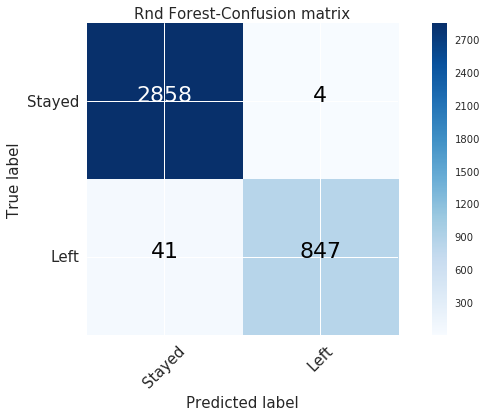

In [65]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix_rnf, classes=class_names,
                      title='Rnd Forest-Confusion matrix')
plt.show()

In [44]:
print(metrics.classification_report(y_test,y_test_pred,target_names = class_names))

             precision    recall  f1-score   support

   0-Stayed       0.99      1.00      0.99      2862
     1-Left       1.00      0.95      0.97       888

avg / total       0.99      0.99      0.99      3750



In [25]:
clf_rfe = RFE(clf)

In [26]:
clf_rfe = clf_rfe.fit(X_train,y_train)

C:\Users\sarni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
clf_rfe.ranking_

array([1, 2, 1, 1, 1, 5, 6, 3, 4])

In [28]:
y_p=clf_rfe.predict(X_test)

In [29]:
clf_rfe.score(X_test,y_test)

0.986

In [30]:
metrics.accuracy_score(y_test,y_p)

0.986

SVM

In [45]:
#Initiate the Support vector Classifier
SVM = svm.SVC(kernel='linear')


In [13]:
#Cross Validation Score
svm_scores=cross_val_score(SVM,X,np.ravel(y),cv=10)
print(svm_scores)

[ 0.776  0.771  0.779  0.78   0.787  0.785  0.777  0.77   0.76   0.743]


In [ ]:
#mean score and the 95% confidence interval of the score estimate
print("SVM Classifier Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))

In [ ]:
 #Cross Validation predict
predicted_svm = cross_val_predict(SVM,X,np.ravel(y),cv=10)
print(predicted_svm)

In [69]:
a_score_svm = accuracy_score(y,predicted_svm)
print("SVM - Metric function accuracy for cross_val_predict data:%f" %a_score_svm)

SVM - Metric function accuracy for cross_val_predict data:0.766927


In [47]:
#Fit the training data
SVM.fit(X_train,np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
SVM.score(X_test,y_test)

0.779

In [49]:
#predict the response values for the observations in X_test
y_test_pred_svm = SVM.predict(X_test)


In [50]:
y_test_pred_svm

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
#compare actual response value (y_test) with the predicted response value (y_pred)
a_score_test_svm = accuracy_score(y_test,y_test_pred_svm)
print("SVM - Metric function accuracy for predicted data:%f" %a_score_test_svm)

SVM - Metric function accuracy for predicted data:0.779200


In [52]:
cnf_matrix_svm = metrics.confusion_matrix(y_test,y_test_pred_svm)

[[2691  171]
 [ 657  231]]


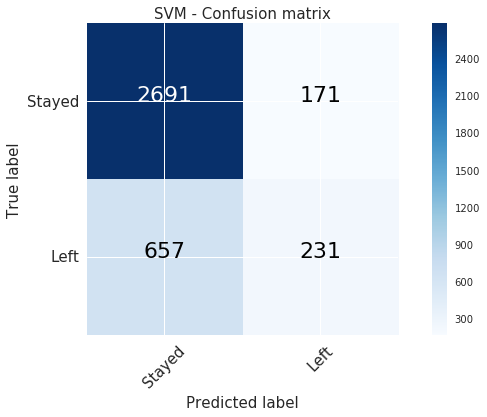

In [60]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
                      title='SVM - Confusion matrix')
plt.show()

In [54]:
print(metrics.classification_report(y_test,y_test_pred_svm,target_names = class_names))

             precision    recall  f1-score   support

   0-Stayed       0.80      0.94      0.87      2862
     1-Left       0.57      0.26      0.36       888

avg / total       0.75      0.78      0.75      3750



K-NN

In [55]:
#Initiate KnnClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [67]:
#Cross Validation Score
knn_scores=cross_val_score(knn,X,np.ravel(y),cv=10)
print(knn_scores)

[ 0.932  0.929  0.932  0.926  0.918  0.937  0.948  0.939  0.944  0.941]


In [68]:
#mean score and the 95% confidence interval of the score estimate
print("KNN Classifier Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

KNN Classifier Accuracy: 0.93 (+/- 0.02)


In [69]:
 #Cross Validation predict
predicted_knn = cross_val_predict(knn,X,np.ravel(y),cv=10)
print(predicted_knn)

[1 1 1 ..., 1 1 1]


In [70]:
a_score_knn = accuracy_score(y,predicted_knn)
print("SVM - Metric function accuracy for cross_val_predict data:%f" %a_score_knn)

SVM - Metric function accuracy for cross_val_predict data:0.934529


In [71]:
knn.fit(X_train,y_train)

C:\Users\sarni\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [72]:
knn.score(X_test,y_test)

0.929

In [73]:
#predict the response values for the observations in X_test
y_test_pred_knn= knn.predict(X_test)

In [41]:
y_test_pred_knn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
#compare actual response value (y_test) with the predicted response value (y_pred)
a_score_test_knn = accuracy_score(y_test,y_test_pred_knn)
print("SVM - Metric function accuracy for predicted data:%f" %a_score_test_knn)

SVM - Metric function accuracy for predicted data:0.928533


In [74]:
cnf_matrix_knn = metrics.confusion_matrix(y_test,y_test_pred_knn)

[[2692  170]
 [  98  790]]


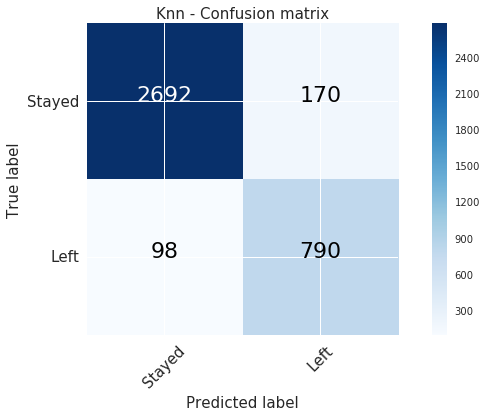

In [75]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix_knn, classes=class_names,
                      title='Knn - Confusion matrix')
plt.show()

In [45]:
print(metrics.classification_report(y_test,y_test_pred_knn,target_names = class_names))

             precision    recall  f1-score   support

   0-Stayed       0.96      0.94      0.95      2862
     1-Left       0.82      0.89      0.85       888

avg / total       0.93      0.93      0.93      3750



In [76]:
#Initiate Decision tree classifier
Tree = tree.DecisionTreeClassifier()
Tree.fit(X_train,np.ravel(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
#Cross Validation Score
tree_scores=cross_val_score(Tree,X,np.ravel(y),cv=10)
print(tree_scores)

[ 0.985  0.983  0.967  0.969  0.959  0.98   0.989  0.992  1.     1.   ]


In [78]:
#mean score and the 95% confidence interval of the score estimate
print("TREE Classifier Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

TREE Classifier Accuracy: 0.98 (+/- 0.03)


In [79]:
#Cross Validation Predict
predicted_tree= cross_val_predict(Tree,X,np.ravel(y),cv=10)
print(predicted_tree)

[1 1 1 ..., 1 1 1]


In [80]:
a_score_tree = accuracy_score(y,predicted_tree)
print("TREE - Metric function accuracy for cross_val_predict data:%f" %a_score_tree)

TREE - Metric function accuracy for cross_val_predict data:0.981399


In [81]:
Tree.score(X_test,y_test)

0.977

In [82]:
#predict the response values for the observations in X_test
y_test_pred_tree= Tree.predict(X_test)

In [53]:
y_test_pred_tree

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
#compare actual response value (y_test) with the predicted response value (y_pred)
a_score_test_tree = accuracy_score(y_test,y_test_pred_tree)
print("SVM - Metric function accuracy for predicted data:%f" %a_score_test_tree)

SVM - Metric function accuracy for predicted data:0.977067


In [84]:
cnf_matrix_tree = metrics.confusion_matrix(y_test,y_test_pred_tree)

[[2813   49]
 [  37  851]]


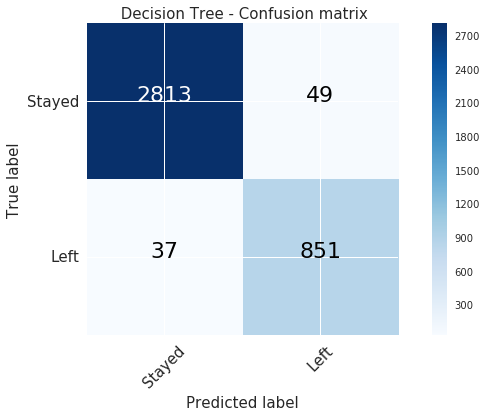

In [85]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix_tree, classes=class_names,
                      title=' Decision Tree - Confusion matrix')
plt.show()

In [57]:
print(metrics.classification_report(y_test,y_test_pred_tree,target_names = class_names))

             precision    recall  f1-score   support

   0-Stayed       0.99      0.98      0.99      2862
     1-Left       0.95      0.96      0.96       888

avg / total       0.98      0.98      0.98      3750

